## Traffic EDA
Read out and process the traffic data for each road

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
# Read road CSV to dataframe and create list of roads
network_df = pd.read_csv("../data/df_road_N1andN2.csv")
road_list = network_df["road"].unique().tolist()
print(road_list)

['N1', 'N2', 'N105', 'N102', 'N104', 'N111', 'N107', 'N108', 'N109', 'N110', 'N204', 'N207', 'N209', 'N206', 'N210']


In [3]:
# Read traffic data from htm files
traffic_dfs = {}
for road in road_list:
    file_location = f'../data/RMMS/{road}.traffic.htm'
    df_list = pd.read_html(file_location)
    df = df_list[-1].iloc[1:] # take the last table available, and drop first row
    
    # Combine the first two rows, set them as column names, and drop
    columns = df.iloc[0:2].T
    columns = columns[1] + ' ' + columns[2].astype(str)
    df.columns = columns.T
    df = df.drop([1,2], axis='index')
    
    traffic_dfs[road] = df

Note: Some roads contains bridges in both directions. We assume that if the bridge breaks, it affects traffic in both directions, so we can take the average of it.

In [4]:
# Make list with the columns with traffic values
traffic_cols = traffic_dfs["N1"].columns.tolist()[9:]

In [5]:
# Create dictionary with traffic per road per type
traffic_dict = {}
for road, df in traffic_dfs.items():
    traffic_dict[road] = df[traffic_cols].astype(float).mean().tolist()

In [6]:
# Create dataframe from traffic dict
traffic_per_road = pd.DataFrame.from_dict(traffic_dict, orient='index', columns=traffic_cols)
traffic_per_road

,Traffic Data Heavy Truck,Traffic Data Medium Truck,Traffic Data Small Truck,Traffic Data Large Bus,Traffic Data Medium Bus,Traffic Data Micro Bus,Traffic Data Utility,Traffic Data Car,Traffic Data Auto Rickshaw,Traffic Data Motor Cycle,Traffic Data Bi-Cycle,Traffic Data Cycle Rickshaw,Traffic Data Cart,Total Motorized,Total Non Motorized,Total Total AADT,Traffic (AADT)
N1,275.009524,3684.485714,1056.628571,1461.685714,643.495238,1120.895238,284.180952,1020.285714,2083.838095,510.657143,173.695238,555.638095,0.133333,12141.161905,729.466667,12870.628571,12870.628571
N2,270.965517,1919.137931,843.137931,1223.034483,369.896552,1198.793103,248.689655,882.103448,2742.931034,624.517241,228.206897,663.931034,2.689655,10323.206897,894.827586,11218.034483,11218.034483
N105,299.142857,3761.428571,1229.428571,76.000000,65.571429,1008.714286,140.571429,928.571429,2170.714286,573.285714,120.571429,764.285714,0.000000,10253.428571,884.857143,11138.285714,11138.285714
N102,237.100000,1092.600000,676.400000,483.700000,134.200000,503.800000,222.200000,295.200000,4322.300000,636.900000,171.100000,639.000000,0.000000,8604.400000,810.100000,9414.500000,9414.500000
N104,67.181818,834.636364,461.272727,418.909091,360.181818,471.000000,76.909091,196.636364,4103.000000,783.363636,304.181818,1060.000000,2.909091,7773.090909,1367.090909,9140.181818,9140.181818
N111,0.000000,254.000000,410.000000,452.000000,199.000000,517.000000,419.000000,233.000000,2812.000000,821.000000,46.000000,112.000000,0.000000,6117.000000,158.000000,6275.000000,6275.000000
N107,0.000000,338.000000,475.000000,132.000000,0.000000,265.000000,27.000000,258.000000,2685.000000,815.000000,306.000000,365.000000,0.000000,4995.000000,671.000000,5666.000000,5666.000000
N108,0.000000,180.000000,130.000000,133.000000,64.000000,402.000000,56.000000,507.000000,2196.000000,621.000000,222.000000,1022.000000,0.000000,4289.000000,1244.000000,5533.000000,5533.000000
N109,0.000000,180.000000,130.000000,133.000000,64.000000,402.000000,56.000000,507.000000,2196.000000,621.000000,222.000000,1022.000000,0.000000,4289.000000,1244.000000,5533.000000,5533.000000
N110,0.000000,254.000000,410.000000,452.000000,199.000000,517.000000,419.000000,233.000000,2812.000000,821.000000,46.000000,112.000000,0.000000,6117.000000,158.000000,6275.000000,6275.000000


In [7]:
#percentage of traffic per road
traffic_per_road['Percentage of traffic'] = (traffic_per_road['Traffic (AADT)'] / sum(traffic_per_road['Traffic (AADT)']))*100
traffic_per_road

,Traffic Data Heavy Truck,Traffic Data Medium Truck,Traffic Data Small Truck,Traffic Data Large Bus,Traffic Data Medium Bus,Traffic Data Micro Bus,Traffic Data Utility,Traffic Data Car,Traffic Data Auto Rickshaw,Traffic Data Motor Cycle,Traffic Data Bi-Cycle,Traffic Data Cycle Rickshaw,Traffic Data Cart,Total Motorized,Total Non Motorized,Total Total AADT,Traffic (AADT),Percentage of traffic
N1,275.009524,3684.485714,1056.628571,1461.685714,643.495238,1120.895238,284.180952,1020.285714,2083.838095,510.657143,173.695238,555.638095,0.133333,12141.161905,729.466667,12870.628571,12870.628571,9.395673
N2,270.965517,1919.137931,843.137931,1223.034483,369.896552,1198.793103,248.689655,882.103448,2742.931034,624.517241,228.206897,663.931034,2.689655,10323.206897,894.827586,11218.034483,11218.034483,8.189265
N105,299.142857,3761.428571,1229.428571,76.000000,65.571429,1008.714286,140.571429,928.571429,2170.714286,573.285714,120.571429,764.285714,0.000000,10253.428571,884.857143,11138.285714,11138.285714,8.131048
N102,237.100000,1092.600000,676.400000,483.700000,134.200000,503.800000,222.200000,295.200000,4322.300000,636.900000,171.100000,639.000000,0.000000,8604.400000,810.100000,9414.500000,9414.500000,6.872669
N104,67.181818,834.636364,461.272727,418.909091,360.181818,471.000000,76.909091,196.636364,4103.000000,783.363636,304.181818,1060.000000,2.909091,7773.090909,1367.090909,9140.181818,9140.181818,6.672414
N111,0.000000,254.000000,410.000000,452.000000,199.000000,517.000000,419.000000,233.000000,2812.000000,821.000000,46.000000,112.000000,0.000000,6117.000000,158.000000,6275.000000,6275.000000,4.580806
N107,0.000000,338.000000,475.000000,132.000000,0.000000,265.000000,27.000000,258.000000,2685.000000,815.000000,306.000000,365.000000,0.000000,4995.000000,671.000000,5666.000000,5666.000000,4.136230
N108,0.000000,180.000000,130.000000,133.000000,64.000000,402.000000,56.000000,507.000000,2196.000000,621.000000,222.000000,1022.000000,0.000000,4289.000000,1244.000000,5533.000000,5533.000000,4.039139
N109,0.000000,180.000000,130.000000,133.000000,64.000000,402.000000,56.000000,507.000000,2196.000000,621.000000,222.000000,1022.000000,0.000000,4289.000000,1244.000000,5533.000000,5533.000000,4.039139
N110,0.000000,254.000000,410.000000,452.000000,199.000000,517.000000,419.000000,233.000000,2812.000000,821.000000,46.000000,112.000000,0.000000,6117.000000,158.000000,6275.000000,6275.000000,4.580806


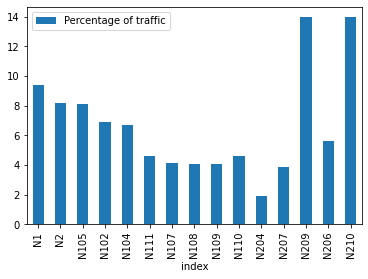

In [8]:
# Plot of the percentage of traffic per road
traffic_per_road.reset_index(inplace=True)
traffic_per_road
traffic_per_road.plot(x='index',y='Percentage of traffic',use_index=True, kind = 'bar');

In [17]:
top_3_critical_roads = traffic_per_road.sort_values(by=['Percentage of traffic'], ascending=False)
top_3_critical_roads[['index','Percentage of traffic']].head(3)

,index,Percentage of traffic
12,N209,13.969450
14,N210,13.969450
0,N1,9.395673


In [9]:
# Write to CSV
traffic_per_road.to_csv("../data/traffic_per_road.csv", index_label="Road")